# 1.	Research Preparation

### a. Define research questions

In [670]:
#RQ1: Which of our products have produced the most revenue given their time on the market?

### b.	Select analyses to answer research questions

In [671]:
#RQ1: Revenue x Time chart

### c.	Import libraries

In [672]:
#Mount the drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [673]:
#Import frequent Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

### d. Import data

In [674]:
#Set my number format preference
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [675]:
#Import the data from online and then get the data from one excel sheet
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'
r = requests.get(url)
open('online_retail_II.xlsx','wb').write(r.content)
data1 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
data1.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom


In [676]:
#Get the data from a second excel sheet
data2 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
data2.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [677]:
#Combine the data from both excel sheets by adding rows of one to the other
#Reorder the rows ascending based on date
#Check the beginning of the data frame
df=(pd.concat([data1,data2], axis=0)).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [678]:
#Get the number of rows and columns of the data
df.shape

(1067371, 8)

# 2.	Clean Columns

### a. Drop unnecessary columns

In [679]:
#Drop the columns that we don't need in the analysis.
#Check the result
df=df.drop(['Customer ID','Country'], axis=1).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25


### b. Rename columns as desired

In [680]:
#Rename columns for clarity and make the changes permenant
df.rename(columns = {'InvoiceDate': 'Date', 'Invoice': 'InvoiceNo', 'StockCode': 'Product ID'}, inplace=True)
df.head(5)

,InvoiceNo,Product ID,Description,Quantity,Date,Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25


### c. Change date format of a column

In [681]:
# Convert the Date column to show the date only and omit the time.
from datetime import datetime
df["Date"] = df["Date"].dt.date
df.head(2)

,InvoiceNo,Product ID,Description,Quantity,Date,Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75


### d. Remove/replace null data in a column

In [682]:
#Get the total number of null values in each column.
df.isnull().sum()

InvoiceNo         0
Product ID        0
Description    4382
Quantity          0
Date              0
Price             0
dtype: int64

In [683]:
#Calculate the percentage of null values in each column, list descending, and format the result to two decimal places.
(df.isnull().sum()/len(df)).sort_values(ascending=False).apply('{:,.2%}'.format)

Description    0.41%
InvoiceNo      0.00%
Product ID     0.00%
Quantity       0.00%
Date           0.00%
Price          0.00%
dtype: object

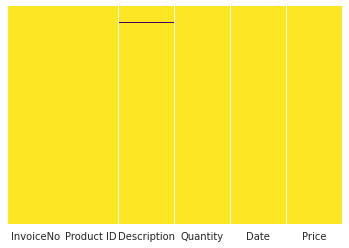

In [684]:
#See where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis_r');

In [685]:
#Decide to remove or replace null values (replace through imputation for each column)
#We decide to remove all rows with null values. 
#Remove nulls then check the result.
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo      0
Product ID     0
Description    0
Quantity       0
Date           0
Price          0
dtype: int64

In [686]:
#See the number of rows and columns we have now.
df.shape

(1062989, 6)

### e. Reformat column data types as needed

In [687]:
#Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062989 entries, 0 to 541909
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1062989 non-null  object 
 1   Product ID   1062989 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1062989 non-null  int64  
 4   Date         1062989 non-null  object 
 5   Price        1062989 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 56.8+ MB


In [688]:
#Change a column's data type and check to see that it changed.
df = df.astype({"Date": 'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062989 entries, 0 to 541909
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   InvoiceNo    1062989 non-null  object        
 1   Product ID   1062989 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1062989 non-null  int64         
 4   Date         1062989 non-null  datetime64[ns]
 5   Price        1062989 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 56.8+ MB


# 3. Clean Rows

### a. Remove unnecessary rows of numerical data

In [689]:
#Remove rows of items that were returned that have a 'C' in the stockcode.
#See how many rows are left.
df = df[~df['InvoiceNo'].str.contains('C', na=False)]
df.shape

(1043495, 6)

In [690]:
#Remove negative prices and negative quantities. We'll keep their initial orders.
#Keep only the rows that are greater than zero. 
#Check the resulting min and max.
df = df[df['Price'] > 0]
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,Price
count,1041670.00,1041670.00
mean,10.96,4.08
std,126.51,51.45
min,1.00,0.00
25%,1.00,1.25
50%,3.00,2.10
75%,10.00,4.13
max,80995.00,25111.09


### b. Remove rows outside of target timeframe

In [691]:
#Get the range of dates in the date column.
date_range = str(df['Date'].min()) + ' to ' + str(df['Date'].max())
date_range

'2009-12-01 00:00:00 to 2011-12-09 00:00:00'

In [692]:
#Remove rows with dates that are before or after the dates we want to include by only specifying the dates we want to include.
df=df.loc[(df['Date'] >= '2011-01-01 00:00:00') & (df['Date'] <= '2011-11-30 23:59:59')]
df.shape

(463513, 6)

### c. Remove duplicate rows

In [693]:
#See how many rows are duplicates of another row
df.duplicated(subset=None, keep='first').sum()

4460

In [694]:
#See a list of all duplicate rows (including the ones you want to keep) and sort them ascending using the CustomerID column and then the date column
df[df.duplicated(subset=None, keep=False)].sort_values(['InvoiceNo', 'Product ID', 'Date'])

,InvoiceNo,Product ID,Description,Quantity,Date,Price
42549,540005,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-01-04,0.95
42554,540005,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-01-04,0.95
42611,540014,85194L,HANGING SPRING FLOWER EGG LARGE,1,2011-01-04,0.85
42610,540014,85194L,HANGING SPRING FLOWER EGG LARGE,1,2011-01-04,0.85
42790,540021,21164,HOME SWEET HOME METAL SIGN,1,2011-01-04,2.95
...,...,...,...,...,...,...
514632,579711,84876B,GREEN HEART COMPACT MIRROR,1,2011-11-30,1.25
514586,579711,85049E,SCANDINAVIAN REDS RIBBONS,1,2011-11-30,1.25
514609,579711,85049E,SCANDINAVIAN REDS RIBBONS,1,2011-11-30,1.25
514740,579744,23010,CIRCUS PARADE BABY GIFT SET,1,2011-11-30,16.95


In [695]:
#Remove duplicate rows and see how many rows you now have.
df.drop_duplicates(inplace=True)
df.shape

(459053, 6)

### d. Remove rows with outliers as appropriate

In [696]:
#Select all columns with numbers
df_num = df.select_dtypes(include=np.number)
df_num.head()

,Quantity,Price
42492,6,2.55
42484,5,2.10
42488,12,1.45
42485,10,1.25
42481,10,1.95


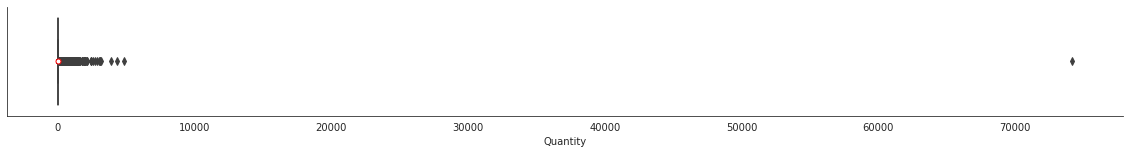

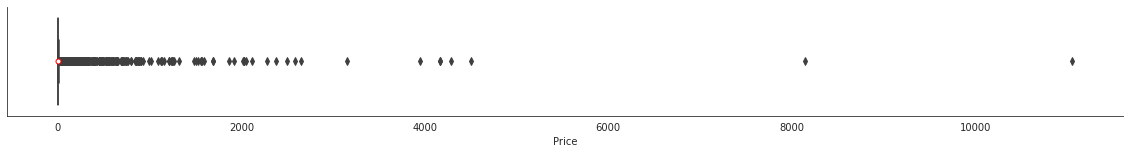

In [697]:
#Plot each numeric column to check for outliers
for column in df_num:
    plt.figure(figsize=(20,2))
    sns.boxplot(x=column, data=df_num, orient="h", showmeans=True, 
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"red", "markersize":"5"})
    sns.set_style('white')
    sns.despine()

In [698]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Quantity', ascending=False).head(10)

,InvoiceNo,Product ID,Description,Quantity,Date,Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27,0.21
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27,0.72
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22,0.82
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19,0.06
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18,2.10
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11,2.10
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02,0.32
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04,1.45
201149,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23,0.42


In [699]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Price', ascending=False).head(10)

,InvoiceNo,Product ID,Description,Quantity,Date,Price
299982,A563185,B,Adjust bad debt,1,2011-08-12,11062.06
173382,551697,POST,POSTAGE,1,2011-05-03,8142.75
297725,562955,DOT,DOTCOM POSTAGE,1,2011-08-11,4505.17
268028,560373,M,Manual,1,2011-07-18,4287.63
422374,573077,M,Manual,1,2011-10-27,4161.06
422377,573080,M,Manual,1,2011-10-27,4161.06
406406,571751,M,Manual,1,2011-10-19,3949.32
374541,569382,M,Manual,1,2011-10-03,3155.95
347948,567353,M,Manual,1,2011-09-19,2653.95
119632,546558,M,Manual,1,2011-03-15,2583.76


In [700]:
#Remove outlier rows that we choose to not consider for this analysis and recheck the data
df.drop(df[df['Price'] > 1000].index, axis=0, inplace = True)
df.sort_values('Price', ascending=False).head(5)

,InvoiceNo,Product ID,Description,Quantity,Date,Price
515835,579787,DOT,DOTCOM POSTAGE,1,2011-11-30,988.00
387106,570258,DOT,DOTCOM POSTAGE,1,2011-10-10,930.04
455261,575607,DOT,DOTCOM POSTAGE,1,2011-11-10,908.16
429588,573576,DOT,DOTCOM POSTAGE,1,2011-10-31,901.58
511104,579471,DOT,DOTCOM POSTAGE,1,2011-11-29,892.50


In [701]:
#Check how many rows you have now
df.shape

(459010, 6)

In [702]:
#Reset the index
df=df.reset_index()
df.head()

,index,InvoiceNo,Product ID,Description,Quantity,Date,Price
0,42492,539993,22303,COFFEE MUG APPLES DESIGN,6,2011-01-04,2.55
1,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10
2,42488,539993,22961,JAM MAKING SET PRINTED,12,2011-01-04,1.45
3,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25
4,42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95


# 4. Feature Engineering

### a. Combine categories within a categorical variable

In [703]:
#List columns that are categorical (not numerical)
df.select_dtypes(['object']).columns

Index(['InvoiceNo', 'Product ID', 'Description'], dtype='object')

In [704]:
df['Product ID'].value_counts().sort_values(ascending=False)

85123A    1957
85099B    1935
22423     1770
47566     1623
20725     1451
          ... 
85225        1
71215        1
84596l       1
21310        1
23617        1
Name: Product ID, Length: 3824, dtype: int64

### b. Create a new date column using datetime data

In [705]:
#Make new columns for Year and Month using a date-time column
df['Year']=df['Date'].apply(lambda date : date.year)
df['Quarter']=df['Date'].apply(lambda date : date.quarter)
df['Month']=df['Date'].apply(lambda date : date.month)
df.head(2)

,index,InvoiceNo,Product ID,Description,Quantity,Date,Price,Year,Quarter,Month
0,42492,539993,22303,COFFEE MUG APPLES DESIGN,6,2011-01-04,2.55,2011,1,1
1,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,2011,1,1


In [706]:
#Look at the range of dates included in the data
df['Date']

0        2011-01-04
1        2011-01-04
2        2011-01-04
3        2011-01-04
4        2011-01-04
            ...    
459005   2011-11-30
459006   2011-11-30
459007   2011-11-30
459008   2011-11-30
459009   2011-11-30
Name: Date, Length: 459010, dtype: datetime64[ns]

In [707]:
#Create a column for the order month and order quarter
#Create a column for the cohort month and cohort quarter based on the earliest purchase date

df['Order Month']=df['Date'].dt.to_period('M')
df['Month first Sold']=df.groupby('Product ID')['Date'].transform('min').dt.to_period('M')
df['Order Quarter']=df['Date'].dt.to_period('Q')
df['Quarter First Sold']=df.groupby('Product ID')['Date'].transform('min').dt.to_period('Q')
df['First Purchase Date']=df.groupby('Product ID')['Date'].transform('min')
df['Last Purchase Date']=df.groupby('Product ID')['Date'].transform('max')
df.head(5).sort_values(['Date'])

,index,InvoiceNo,Product ID,Description,Quantity,Date,Price,Year,Quarter,Month,Order Month,Month first Sold,Order Quarter,Quarter First Sold,First Purchase Date,Last Purchase Date
0,42492,539993,22303,COFFEE MUG APPLES DESIGN,6,2011-01-04,2.55,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30
1,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30
2,42488,539993,22961,JAM MAKING SET PRINTED,12,2011-01-04,1.45,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30
3,42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04,1.25,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30
4,42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04,1.95,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30


In [708]:
df.tail(20)

,index,InvoiceNo,Product ID,Description,Quantity,Date,Price,Year,Quarter,Month,Order Month,Month first Sold,Order Quarter,Quarter First Sold,First Purchase Date,Last Purchase Date
458990,516349,579885,23451,SQUARE MINI PORTRAIT FRAME,4,2011-11-30,1.95,2011,4,11,2011-11,2011-10,2011Q4,2011Q4,2011-10-14,2011-11-30
458991,516352,579885,21733,RED HANGING HEART T-LIGHT HOLDER,1,2011-11-30,2.95,2011,4,11,2011-11,2011-01,2011Q4,2011Q1,2011-01-04,2011-11-30
458992,516334,579885,23137,ZINC WIRE SWEETHEART LETTER TRAY,1,2011-11-30,3.75,2011,4,11,2011-11,2011-04,2011Q4,2011Q2,2011-04-21,2011-11-30
458993,516353,579885,72741,GRAND CHOCOLATECANDLE,9,2011-11-30,1.45,2011,4,11,2011-11,2011-01,2011Q4,2011Q1,2011-01-05,2011-11-30
458994,516354,579885,21682,LARGE MEDINA STAMPED METAL BOWL,2,2011-11-30,4.95,2011,4,11,2011-11,2011-01,2011Q4,2011Q1,2011-01-16,2011-11-30
458995,516355,579885,21317,GLASS SPHERE CANDLE STAND MEDIUM,2,2011-11-30,5.45,2011,4,11,2011-11,2011-01,2011Q4,2011Q1,2011-01-23,2011-11-30
458996,516356,579885,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,1,2011-11-30,8.50,2011,4,11,2011-11,2011-01,2011Q4,2011Q1,2011-01-04,2011-11-30
458997,516357,579885,22170,PICTURE FRAME WOOD TRIPLE PORTRAIT,1,2011-11-30,6.75,2011,4,11,2011-11,2011-01,2011Q4,2011Q1,2011-01-04,2011-11-30
458998,516358,579885,82483,WOOD 2 DRAWER CABINET WHITE FINISH,2,2011-11-30,6.95,2011,4,11,2011-11,2011-01,2011Q4,2011Q1,2011-01-04,2011-11-30
458999,516332,579885,23456,MEDIUM PARLOUR PICTURE FRAME,1,2011-11-30,4.15,2011,4,11,2011-11,2011-10,2011Q4,2011Q4,2011-10-16,2011-11-30


### c. Create a new column of data using numerical data

In [709]:
# Create a revenue colummn by multiplying two columns to see total spent for that person for that transaction
df["Revenue"] = df["Quantity"] * df["Price"]
df.head(2)

,index,InvoiceNo,Product ID,Description,Quantity,Date,Price,Year,Quarter,Month,Order Month,Month first Sold,Order Quarter,Quarter First Sold,First Purchase Date,Last Purchase Date,Revenue
0,42492,539993,22303,COFFEE MUG APPLES DESIGN,6,2011-01-04,2.55,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30,15.30
1,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30,10.50


In [710]:
#Create a time on the market column
df["Days on the Market"] = df["Last Purchase Date"] - df["First Purchase Date"]
df.head(2)

,index,InvoiceNo,Product ID,Description,Quantity,Date,Price,Year,Quarter,Month,Order Month,Month first Sold,Order Quarter,Quarter First Sold,First Purchase Date,Last Purchase Date,Revenue,Days on the Market
0,42492,539993,22303,COFFEE MUG APPLES DESIGN,6,2011-01-04,2.55,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30,15.30,330 days
1,42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04,2.10,2011,1,1,2011-01,2011-01,2011Q1,2011Q1,2011-01-04,2011-11-30,10.50,330 days


In [711]:
#Get statistics on each product
df1 = df.groupby(df['Product ID']).agg({'Description':'first', 'Revenue': 'sum', 'Quantity': 'sum', 'Days on the Market':'first', 'Quarter First Sold':'first'})
df1

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold
Product ID,,,,,
10002,INFLATABLE POLITICAL GLOBE,525.48,609,103 days,2011Q1
10080,GROOVY CACTUS INFLATABLE,119.09,303,267 days,2011Q1
10120,DOGGY RUBBER,35.70,170,283 days,2011Q1
10125,MINI FUNKY DESIGN TAPES,881.03,1115,316 days,2011Q1
10133,COLOURING PENCILS BROWN TUBE,1454.33,2726,246 days,2011Q1
...,...,...,...,...,...
gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,66.64,8,177 days,2011Q1
gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,167.05,10,299 days,2011Q1
gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,175.53,7,240 days,2011Q1


In [712]:
#Remove products that have sold less than 100 items
df1.drop(df1[df1['Quantity'] < 100].index, axis=0, inplace = True)
df1.sort_values('Revenue', ascending=False).head(5)

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold
Product ID,,,,,
22423,REGENCY CAKESTAND 3 TIER,140467.66,11325,330 days,2011Q1
DOT,DOTCOM POSTAGE,131126.07,617,330 days,2011Q1
47566,PARTY BUNTING,97319.01,17910,330 days,2011Q1
85123A,WHITE HANGING HEART T-LIGHT HOLDER,91800.98,33074,330 days,2011Q1
85099B,JUMBO BAG RED RETROSPOT,87913.76,45115,330 days,2011Q1


In [713]:
#Remove products that have sold more than 75,000 in revenue so we can see the midsized and smaller items
df1.drop(df1[df1['Revenue'] > 75000].index, axis=0, inplace = True)
df1.sort_values('Revenue', ascending=False).head(5)

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold
Product ID,,,,,
POST,POSTAGE,62763.84,2805,330 days,2011Q1
23084,RABBIT NIGHT LIGHT,57241.57,26435,204 days,2011Q2
84879,ASSORTED COLOUR BIRD ORNAMENT,52792.53,32669,330 days,2011Q1
22502,PICNIC BASKET WICKER SMALL,50287.91,1763,264 days,2011Q1
22086,PAPER CHAIN KIT 50'S CHRISTMAS,48799.73,14787,330 days,2011Q1


In [714]:
#Check the data type of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 10002 to POST
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Description         2562 non-null   object         
 1   Revenue             2562 non-null   float64        
 2   Quantity            2562 non-null   int64          
 3   Days on the Market  2562 non-null   timedelta64[ns]
 4   Quarter First Sold  2562 non-null   period[Q-DEC]  
dtypes: float64(1), int64(1), object(1), period[Q-DEC](1), timedelta64[ns](1)
memory usage: 120.1+ KB


In [715]:
#Change a column's data type and check to see that it changed.
df1['Days on the Market'] = df1['Days on the Market'].dt.days
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2562 entries, 10002 to POST
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype        
---  ------              --------------  -----        
 0   Description         2562 non-null   object       
 1   Revenue             2562 non-null   float64      
 2   Quantity            2562 non-null   int64        
 3   Days on the Market  2562 non-null   int64        
 4   Quarter First Sold  2562 non-null   period[Q-DEC]
dtypes: float64(1), int64(2), object(1), period[Q-DEC](1)
memory usage: 120.1+ KB


In [716]:
#Remove products that have been on the market for less than 30 days
df1.drop(df1[df1['Days on the Market'] < 30].index, axis=0, inplace = True)
df1.sort_values('Revenue', ascending=False).head(5)

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold
Product ID,,,,,
POST,POSTAGE,62763.84,2805,330,2011Q1
23084,RABBIT NIGHT LIGHT,57241.57,26435,204,2011Q2
84879,ASSORTED COLOUR BIRD ORNAMENT,52792.53,32669,330,2011Q1
22502,PICNIC BASKET WICKER SMALL,50287.91,1763,264,2011Q1
22086,PAPER CHAIN KIT 50'S CHRISTMAS,48799.73,14787,330,2011Q1


In [717]:
#Calculate Average Revenue per Day and Average Revenue per Unit Sold
df1['Average Revenue per Day'] = df1['Revenue'] / df1['Days on the Market']
df1['Average Revenue per Unit'] = df1['Revenue'] / df1['Quantity']
df1

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
Product ID,,,,,,,
10002,INFLATABLE POLITICAL GLOBE,525.48,609,103,2011Q1,5.10,0.86
10080,GROOVY CACTUS INFLATABLE,119.09,303,267,2011Q1,0.45,0.39
10120,DOGGY RUBBER,35.70,170,283,2011Q1,0.13,0.21
10125,MINI FUNKY DESIGN TAPES,881.03,1115,316,2011Q1,2.79,0.79
10133,COLOURING PENCILS BROWN TUBE,1454.33,2726,246,2011Q1,5.91,0.53
...,...,...,...,...,...,...,...
90209B,GREEN ENAMEL+GLASS HAIR COMB,328.21,171,271,2011Q1,1.21,1.92
90209C,PINK ENAMEL+GLASS HAIR COMB,444.69,246,298,2011Q1,1.49,1.81
C2,CARRIAGE,6251.00,128,325,2011Q1,19.23,48.84


In [718]:
df1.sort_values('Average Revenue per Day', ascending=False).tail(5)

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
Product ID,,,,,,,
79406,FROSTED WHITE BASE,31.63,141,260,2011Q1,0.12,0.22
79063D,"RETRO PILL BOX , REVOLUTIONARY",35.14,189,291,2011Q1,0.12,0.19
17136A,BLUE STONES ON WIRE FOR CANDLE,29.59,352,275,2011Q1,0.11,0.08
47420,ASSORTED COLOUR SUCTION CUP HOOK,27.55,145,287,2011Q1,0.10,0.19
84199,GLOW IN DARK DOLPHINS,27.09,129,319,2011Q1,0.08,0.21


# 5. Analysis

In [719]:
#Reformat the descriptions to be in titlecase instead of uppercase
df1['Description']=df1['Description'].str.title()
df1

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
Product ID,,,,,,,
10002,Inflatable Political Globe,525.48,609,103,2011Q1,5.10,0.86
10080,Groovy Cactus Inflatable,119.09,303,267,2011Q1,0.45,0.39
10120,Doggy Rubber,35.70,170,283,2011Q1,0.13,0.21
10125,Mini Funky Design Tapes,881.03,1115,316,2011Q1,2.79,0.79
10133,Colouring Pencils Brown Tube,1454.33,2726,246,2011Q1,5.91,0.53
...,...,...,...,...,...,...,...
90209B,Green Enamel+Glass Hair Comb,328.21,171,271,2011Q1,1.21,1.92
90209C,Pink Enamel+Glass Hair Comb,444.69,246,298,2011Q1,1.49,1.81
C2,Carriage,6251.00,128,325,2011Q1,19.23,48.84


In [720]:
#Get ready to annotate Q1's top revenue product
q1 = df1[df1['Quarter First Sold'] == '2011Q1']
q1 = q1[q1['Revenue'] == q1['Revenue'].max()]
q1.reset_index(inplace=True, drop=True)
q1

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Postage,62763.84,2805,330,2011Q1,190.19,22.38


In [721]:
#Get ready to annotate Q2's top revenue product
q2 = df1[df1['Quarter First Sold'] == '2011Q2']
q2 = q2[q2['Revenue'] == q2['Revenue'].max()]
q2.reset_index(inplace=True, drop=True)
q2

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Rabbit Night Light,57241.57,26435,204,2011Q2,280.60,2.17


In [722]:
#Get ready to annotate Q3's top revenue product
q3 = df1[df1['Quarter First Sold'] == '2011Q3']
q3 = q3[q3['Revenue'] == q3['Revenue'].max()]
q3.reset_index(inplace=True, drop=True)
q3

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Hot Water Bottle Keep Calm,24744.12,5136,100,2011Q3,247.44,4.82


In [723]:
#Get ready to annotate Q4's top revenue product
q4 = df1[df1['Quarter First Sold'] == '2011Q4']
q4 = q4[q4['Revenue'] == q4['Revenue'].max()]
q4.reset_index(inplace=True, drop=True)
q4

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Jumbo Bag Paisley Park,10188.06,4331,36,2011Q4,283.00,2.35


In [724]:
#Get ready to add another annotation
other1 = df1[df1['Description'].str.contains('Picnic Basket Wicker Small', na=False)]
other1.reset_index(inplace=True, drop=True)
other1

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Picnic Basket Wicker Small,50287.91,1763,264,2011Q1,190.48,28.52


In [725]:
#Get ready to add another annotation
other2 = df1[df1['Description'].str.contains('Spotty Bunting', na=False)]
other2.reset_index(inplace=True, drop=True)
other2

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Spotty Bunting,42383.32,8328,210,2011Q2,201.83,5.09


In [726]:
#Get ready to add another annotation
other3 = df1[df1['Description'].str.contains('Doormat Keep Calm and Come In', case=False)]
other3.reset_index(inplace=True, drop=True)
other3

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Doormat Keep Calm And Come In,36575.42,5301,217,2011Q2,168.55,6.90


In [727]:
#Get ready to add another annotation
other4 = df1[df1['Description'].str.contains('Assorted Colour Bird Ornament', case=False)]
other4.reset_index(inplace=True, drop=True)
other4

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Assorted Colour Bird Ornament,52792.53,32669,330,2011Q1,159.98,1.62


In [728]:
#Get ready to add another annotation
other5 = df1[df1['Description'].str.contains('Set of 3 Regency Cake Tins', case=False)]
other5.reset_index(inplace=True, drop=True)
other5

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Set Of 3 Regency Cake Tins,29439.26,6074,175,2011Q2,168.22,4.85


In [729]:
#Get ready to add another annotation
other6 = df1[df1['Description'].str.contains('Jumbo Bag Doiley Patterns', case=False)]
other6.reset_index(inplace=True, drop=True)
other6

,Description,Revenue,Quantity,Days on the Market,Quarter First Sold,Average Revenue per Day,Average Revenue per Unit
0,Jumbo Bag Doiley Patterns,40678.76,19819,208,2011Q2,195.57,2.05


In [730]:
#Make a bubble chart of the products
import plotly.express as px
sns.set_style('white')

fig = px.scatter(df1, x="Days on the Market", y="Revenue", size="Average Revenue per Unit", color="Quarter First Sold", hover_name="Description", size_max=50)
fig.show()

sns.despine()

<Figure size 432x288 with 0 Axes>

In [731]:
#Make a bubble chart of the products
import plotly.express as px
sns.set_style('white')

fig = px.scatter(df1, x="Quantity", y="Revenue", size="Average Revenue per Day", color="Quarter First Sold", hover_name="Description", size_max=50)
fig.show()

sns.despine()

<Figure size 432x288 with 0 Axes>

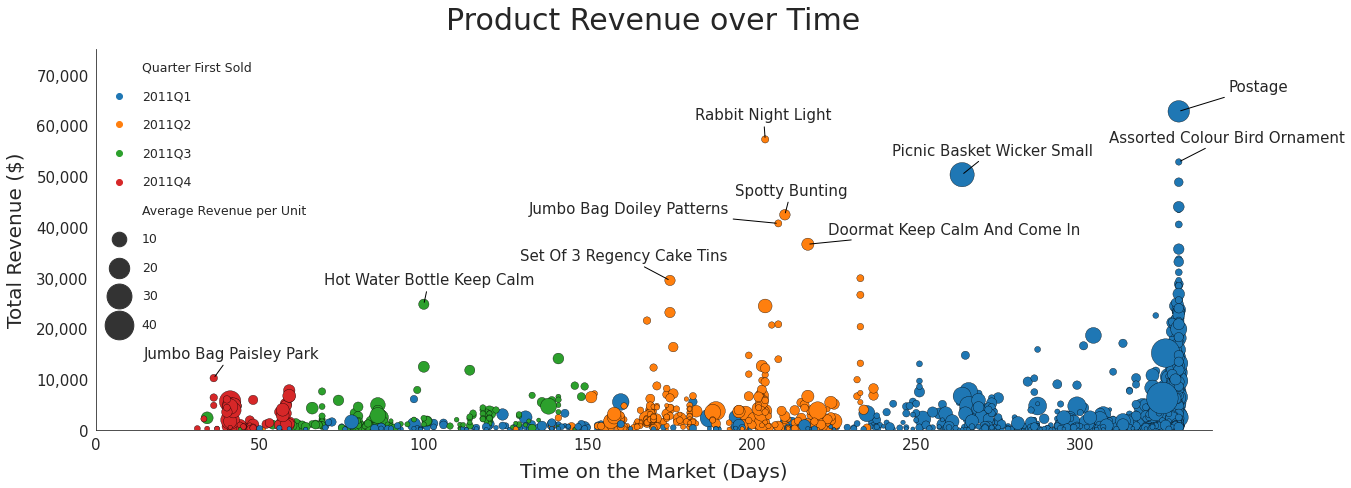

In [735]:
#Make a bubble plot of products
plt.figure(figsize=(20,7))
ax=sns.scatterplot(data=df1, x="Days on the Market", y="Revenue", size="Average Revenue per Unit", legend=True, sizes=(10, 1000), hue='Quarter First Sold', edgecolor='black')

#Set the style
sns.despine()
sns.set_style('white')

#Add chart labels
plt.ylabel("Total Revenue ($)", size=20, labelpad=10)
plt.xlabel("Time on the Market (Days)", size=20,labelpad=10)
plt.title("Product Revenue over Time", size=30, pad=20)
plt.tick_params(axis='both', which='major', labelsize=15)

#Format the axes
plt.ylim(0, 75000)
plt.xlim(0, df1['Days on the Market'].max()+10)

#Format the legend
ax.legend(labelspacing=1.25, frameon = False, fontsize = 12.5)

#Format the y axis numbers
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

#Add an annotation for Q1's top revenue product
ax.annotate(q1.iloc[0,0], xy=(q1.iloc[0,3], q1.iloc[0,1]), size=15, xycoords='data', xytext=(50, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add an annotation for Q2's top revenue product
ax.annotate(q2.iloc[0,0], xy=(q2.iloc[0,3], q2.iloc[0,1]), size=15, xycoords='data', xytext=(-70, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add an annotation for Q3's top revenue product
ax.annotate(q3.iloc[0,0], xy=(q3.iloc[0,3], q3.iloc[0,1]), size=15, xycoords='data', xytext=(-100, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add an annotation for Q4's top revenue product
ax.annotate(q4.iloc[0,0], xy=(q4.iloc[0,3], q4.iloc[0,1]), size=15, xycoords='data', xytext=(-70, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add another annotation
ax.annotate(other1.iloc[0,0], xy=(other1.iloc[0,3], other1.iloc[0,1]), size=15, xycoords='data', xytext=(-70, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add another annotation
ax.annotate(other2.iloc[0,0], xy=(other2.iloc[0,3], other2.iloc[0,1]), size=15, xycoords='data', xytext=(-50, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add another annotation
ax.annotate(other3.iloc[0,0], xy=(other3.iloc[0,3], other3.iloc[0,1]), size=15, xycoords='data', xytext=(20, 10), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add another annotation
ax.annotate(other4.iloc[0,0], xy=(other4.iloc[0,3], other4.iloc[0,1]), size=15, xycoords='data', xytext=(-70, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add another annotation
ax.annotate(other5.iloc[0,0], xy=(other5.iloc[0,3], other5.iloc[0,1]), size=15, xycoords='data', xytext=(-150, 20), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

#Add another annotation
ax.annotate(other6.iloc[0,0], xy=(other6.iloc[0,3], other6.iloc[0,1]), size=15, xycoords='data', xytext=(-250, 10), textcoords='offset points', arrowprops=dict(arrowstyle="-", color='black'));

# 6. Interpret Results 

In [733]:
#RQ1: The products that have produced the most revenue considering their time on the market include the following:
      #Jumbo Bag Paisley Park, 
      #Hot Water Bottle Keep Calm
      #Set of 3 Regency Cake Tins
      #Jumbo Bag Doiley Patterns
      #Spotty Bunting
      #Doormat Keep Calm and Come In
      #Rabbit Night Light
      #Picnic Basket Wicker Small
      #Assorted Colour Bird Ornament
      #Postage

In [734]:
#Play a sound when done
import IPython
display(IPython.display.Audio("/content/drive/MyDrive/Python/Ring08.wav", autoplay=True))